tensorflow 官网教程学习。 [网址](https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough)

# Set up

In [0]:
import tensorflow as tf
tf.enable_eager_execution()

import tensorflow.contrib.eager as tfe




In [0]:
import matplotlib.pyplot as plt

# Import and parse data

In [3]:
train_dataset_url =  "http://download.tensorflow.org/data/iris_training.csv"
train_dataset_csv = tf.keras.utils.get_file(
    fname = 'iris_data',
    origin = train_dataset_url
)

8192/2194 [================================================================================================================] - 0s 0us/step


In [4]:
train_dataset_csv

'/root/.keras/datasets/iris_data'

In [5]:
! head -5 {train_dataset_csv}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

feature_names = column_names[:-1]
label_name = column_names[-1]

In [7]:
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [8]:
label_name

'species'

In [0]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
  [train_dataset_csv],
    batch_size = batch_size,
    column_names = column_names,
    label_name = label_name,
    num_epochs = 1
)

In [0]:
feature, label = next(iter(train_dataset))

In [11]:
list(feature.values())

[<tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
 array([6.6, 4.6, 4.9, 5.1, 6.4, 6.1, 5.1, 5.8, 6.9, 4.8, 5.1, 5.7, 5.2,
        6.1, 4.4, 5.9, 4.5, 6.4, 4.4, 5.5, 5. , 4.8, 6.3, 5.8, 6.4, 5.4,
        7.7, 6.3, 4.9, 6.1, 6.3, 7.4], dtype=float32)>,
 <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
 array([2.9, 3.2, 3.1, 3.5, 2.7, 2.9, 3.8, 2.7, 3.1, 3. , 3.7, 3. , 3.4,
        2.6, 3. , 3.2, 2.3, 3.2, 2.9, 2.6, 3.6, 3.4, 2.3, 4. , 3.1, 3.9,
        3. , 3.4, 3.1, 3. , 2.7, 2.8], dtype=float32)>,
 <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
 array([4.6, 1.4, 1.5, 1.4, 5.3, 4.7, 1.5, 5.1, 5.1, 1.4, 1.5, 4.2, 1.4,
        5.6, 1.3, 4.8, 1.3, 5.3, 1.4, 4.4, 1.4, 1.6, 4.4, 1.2, 5.5, 1.3,
        6.1, 5.6, 1.5, 4.9, 4.9, 6.1], dtype=float32)>,
 <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
 array([1.3, 0.2, 0.1, 0.3, 1.9, 1.4, 0.3, 1.9, 2.3, 0.1, 0.4, 1.2, 0.2,
        1.4, 0.2, 1.8, 0.3, 2.3, 0.2, 1.2, 0.2, 0.2, 1.3, 0.2, 1.8, 0.4,
        2.3, 2.4, 0.1, 1.8, 

In [0]:
def parse_feature(features, label):
  features = tf.stack(list(features.values()), axis=1)
  return (features, label)

In [0]:
train_dataset = train_dataset.map(parse_feature)

In [0]:
feature, label = next(iter(train_dataset))

In [15]:
feature

<tf.Tensor: id=102, shape=(32, 4), dtype=float32, numpy=
array([[7.3, 2.9, 6.3, 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [6. , 2.9, 4.5, 1.5],
       [5. , 2. , 3.5, 1. ],
       [5.3, 3.7, 1.5, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 3.3, 6. , 2.5],
       [4.8, 3.1, 1.6, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [5.2, 3.4, 1.4, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2.3, 3.3, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 3. , 4.2, 1.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.2, 2.8, 4.8, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [5.7, 2.9, 4.2, 1.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 4.4, 1.5, 0.4],
       [5.5, 2.6, 4.4, 1.2],
       [6.5, 3. , 5.2, 2. ],
       [5. , 3. , 1.6, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.3]], dtype=float32)

# Model selection 

In [0]:
model = tf.keras.Sequential(
  [tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)]
)

In [17]:
y = model(feature)


y[:5]

<tf.Tensor: id=194, shape=(5, 3), dtype=float32, numpy=
array([[-1.6076798 , -0.80675673, -1.5272481 ],
       [-1.3450482 , -0.53869826, -1.0933836 ],
       [-1.4350795 , -0.62759906, -1.2170835 ],
       [-1.0900052 , -0.4348267 , -0.97761047],
       [-1.6786759 , -0.22416122, -0.5665835 ]], dtype=float32)>

In [18]:
help(tf.losses.sparse_softmax_cross_entropy)

Help on function sparse_softmax_cross_entropy in module tensorflow.python.ops.losses.losses_impl:

sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')
    Cross-entropy loss using `tf.nn.sparse_softmax_cross_entropy_with_logits`.
    
    `weights` acts as a coefficient for the loss. If a scalar is provided,
    then the loss is simply scaled by the given value. If `weights` is a
    tensor of shape `[batch_size]`, then the loss weights apply to each
    corresponding sample.
    
    Args:
      labels: `Tensor` of shape `[d_0, d_1, ..., d_{r-1}]` (where `r` is rank of
        `labels` and result) and dtype `int32` or `int64`. Each entry in `labels`
        must be an index in `[0, num_classes)`. Other values will raise an
        exception when this op is run on CPU, and return `NaN` for corresponding
        loss and gradient rows on GPU.
      logits: Unscaled log probabilities of shape
       

# Training 

In [0]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [20]:
loss(model, feature, label)

<tf.Tensor: id=241, shape=(), dtype=float32, numpy=1.3608472>

In [0]:
def grad(model, input_val, target):
  with tf.GradientTape() as tape:
    loss_value = loss(model, input_val, target)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optmizor = tf.train.GradientDescentOptimizer(learning_rate=0.01)
step = tf.train.get_or_create_global_step()

In [23]:
train_loss_result = []
train_accuracy_result = []

num_epochs = 501

for epoch in range(num_epochs):
  epoch_loss = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()
  
  for x, y in train_dataset:
    loss_value, grads = grad(model, x, y)
    optmizor.apply_gradients(zip(grads, model.trainable_variables), step)
    epoch_loss(loss_value)
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
  train_loss_result.append(epoch_loss.result())
  train_accuracy_result.append(epoch_accuracy.result())
  if epoch % 50 == 0:
      print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                  epoch_loss.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.365, Accuracy: 30.000%
Epoch 050: Loss: 0.603, Accuracy: 70.833%
Epoch 100: Loss: 0.369, Accuracy: 91.667%
Epoch 150: Loss: 0.267, Accuracy: 96.667%
Epoch 200: Loss: 0.191, Accuracy: 96.667%
Epoch 250: Loss: 0.154, Accuracy: 96.667%
Epoch 300: Loss: 0.137, Accuracy: 95.833%
Epoch 350: Loss: 0.108, Accuracy: 97.500%
Epoch 400: Loss: 0.094, Accuracy: 98.333%
Epoch 450: Loss: 0.099, Accuracy: 97.500%
Epoch 500: Loss: 0.086, Accuracy: 98.333%


# Evaluation

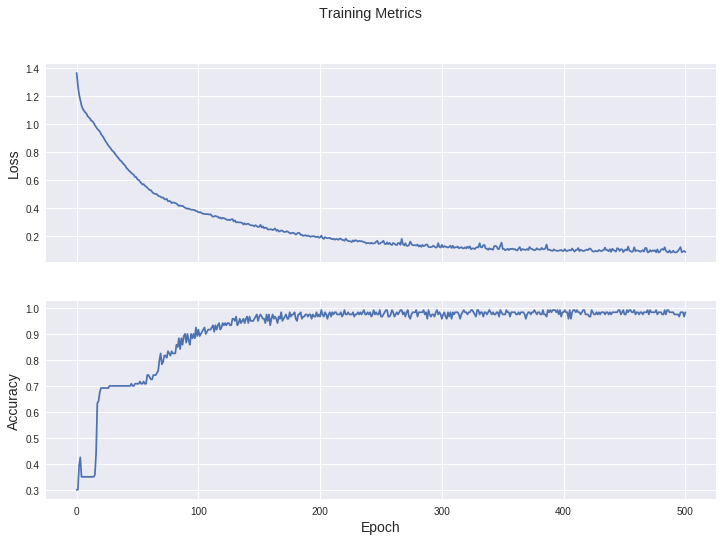

In [24]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_result)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_result);

In [26]:
test_url = "http://download.tensorflow.org/data/iris_test.csv"

test_dataset_csv = tf.keras.utils.get_file(
  fname = 'test_data',
  origin = test_url
)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [28]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_dataset_csv,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(parse_feature)

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


In [37]:
accuracy = tfe.metrics.Accuracy()
for (x, y) in test_dataset:
  logit = model(x)
  prediction = tf.argmax(logit, axis=1, output_type= tf.int32)
#   print(prediction)
  accuracy(prediction, y)
#   print(accuracy)
print(accuracy.result())

tf.Tensor(0.9666666666666667, shape=(), dtype=float64)


# Prediction

In [39]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
#   print(class_idx)
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.6%)
Example 1 prediction: Iris versicolor (98.6%)
Example 2 prediction: Iris virginica (82.4%)
